# Create a manual model with PyTorch

In [1]:
import os

from pathlib import Path

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: path = Path('../input/titanic')
else:
    path = Path('titanic')
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

In [2]:
import torch, numpy as np, pandas as pd

In [3]:
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [4]:
df = pd.read_csv(path/'train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
df.groupby(['Sex'])['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

In [10]:
df.mean()

/tmp/ipykernel_2494/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [11]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [12]:
# Fill NaNs with mode
df.fillna(value=modes, inplace=True)

In [13]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
import numpy as np
df.describe(include=np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

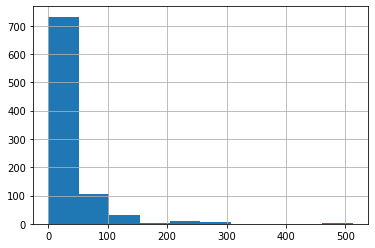

In [15]:
df['Fare'].hist()

<AxesSubplot:>

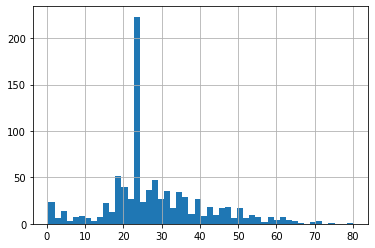

In [16]:
df['Age'].hist(bins=50)

In [17]:
df['LogFare'] = np.log1p(df['Fare'])
# df['LogFare'] = np.log(df['Fare']+1)

<AxesSubplot:>

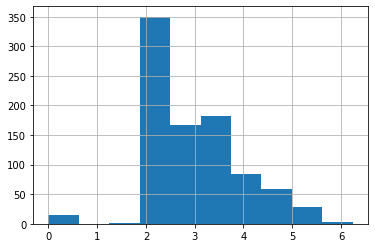

In [21]:
df['LogFare'].hist()

In [22]:
df['Age'] = np.log1p(df['Age'])

<AxesSubplot:>

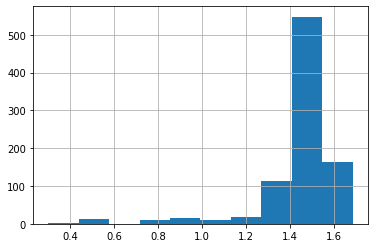

In [23]:
df['Age'].hist()

In [24]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [25]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [26]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
pclasses = sorted(df['Pclass'].unique())
pclasses

[1, 2, 3]

In [28]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [29]:
df = pd.get_dummies(df, columns=['Sex', 'Pclass', 'Embarked'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   LogFare      891 non-null    float64
 10  Sex_female   891 non-null    uint8  
 11  Sex_male     891 non-null    uint8  
 12  Pclass_1     891 non-null    uint8  
 13  Pclass_2     891 non-null    uint8  
 14  Pclass_3     891 non-null    uint8  
 15  Embarked_C   891 non-null    uint8  
 16  Embarked_Q   891 non-null    uint8  
 17  Embarked_S   891 non-null    uint8  
dtypes: float64(3), int64(4), object(3), uint8(8)
memor

In [31]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [32]:
added_cols = ['Sex_female', 'Sex_male', 'Pclass_1','Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [33]:
df[added_cols].head()

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,1,0,0,0,0,1
4,0,1,0,0,1,0,0,1


In [34]:
from torch import tensor

t_dep = tensor(df['Survived'])

In [35]:
# t_dep

In [37]:
indep_cols = ['Age', 'SibSp', 'Parch', 'LogFare'] + added_cols

t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[1.4196, 1.0000, 0.0000, 2.1102, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [1.5398, 1.0000, 0.0000, 4.2806, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000],
        [1.4576, 0.0000, 0.0000, 2.1889, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [1.5225, 1.0000, 0.0000, 3.9908, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [1.5225, 0.0000, 0.0000, 2.2028, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [1.4396, 0.0000, 0.0000, 2.2469, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000],
        [1.6109, 0.0000, 0.0000, 3.9677, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        ...,
        [1.4488, 0.0000, 0.0000, 2.0857, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [1.5452, 0.0000, 5.0000, 3.4054, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000],
        [1.4661, 0.0000, 0.0000, 

In [38]:
t_indep.shape

torch.Size([891, 12])

In [39]:
torch.manual_seed(42)

In [40]:
n_coeff = t_indep.shape[1]
n_coeff

12

In [41]:
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([ 0.3823,  0.4150, -0.1171,  0.4593, -0.1096,  0.1009, -0.2434,  0.2936,  0.4408, -0.3668,  0.4346,  0.0936])

In [42]:
t_indep*coeffs

tensor([[ 0.5427,  0.4150, -0.0000,  0.9692, -0.0000,  0.1009, -0.0000,  0.0000,  0.4408, -0.0000,  0.0000,  0.0936],
        [ 0.5886,  0.4150, -0.0000,  1.9661, -0.1096,  0.0000, -0.2434,  0.0000,  0.0000, -0.3668,  0.0000,  0.0000],
        [ 0.5572,  0.0000, -0.0000,  1.0054, -0.1096,  0.0000, -0.0000,  0.0000,  0.4408, -0.0000,  0.0000,  0.0936],
        [ 0.5820,  0.4150, -0.0000,  1.8330, -0.1096,  0.0000, -0.2434,  0.0000,  0.0000, -0.0000,  0.0000,  0.0936],
        [ 0.5820,  0.0000, -0.0000,  1.0117, -0.0000,  0.1009, -0.0000,  0.0000,  0.4408, -0.0000,  0.0000,  0.0936],
        [ 0.5503,  0.0000, -0.0000,  1.0320, -0.0000,  0.1009, -0.0000,  0.0000,  0.4408, -0.0000,  0.4346,  0.0000],
        [ 0.6158,  0.0000, -0.0000,  1.8224, -0.0000,  0.1009, -0.2434,  0.0000,  0.0000, -0.0000,  0.0000,  0.0936],
        ...,
        [ 0.5538,  0.0000, -0.0000,  0.9580, -0.0000,  0.1009, -0.0000,  0.0000,  0.4408, -0.0000,  0.0000,  0.0936],
        [ 0.5907,  0.0000, -0.5857,  1.5641

In [43]:
# Normalize
vals,indices = t_indep.max(dim=0)
vals

tensor([1.6854, 8.0000, 6.0000, 6.2409, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [44]:
indices

tensor([630, 159, 678, 258,   1,   0,   1,   9,   0,   1,   5,   0])

In [45]:
t_indep = t_indep / vals

In [46]:
t_indep*coeffs

tensor([[ 0.3220,  0.0519, -0.0000,  0.1553, -0.0000,  0.1009, -0.0000,  0.0000,  0.4408, -0.0000,  0.0000,  0.0936],
        [ 0.3492,  0.0519, -0.0000,  0.3150, -0.1096,  0.0000, -0.2434,  0.0000,  0.0000, -0.3668,  0.0000,  0.0000],
        [ 0.3306,  0.0000, -0.0000,  0.1611, -0.1096,  0.0000, -0.0000,  0.0000,  0.4408, -0.0000,  0.0000,  0.0936],
        [ 0.3453,  0.0519, -0.0000,  0.2937, -0.1096,  0.0000, -0.2434,  0.0000,  0.0000, -0.0000,  0.0000,  0.0936],
        [ 0.3453,  0.0000, -0.0000,  0.1621, -0.0000,  0.1009, -0.0000,  0.0000,  0.4408, -0.0000,  0.0000,  0.0936],
        [ 0.3265,  0.0000, -0.0000,  0.1654, -0.0000,  0.1009, -0.0000,  0.0000,  0.4408, -0.0000,  0.4346,  0.0000],
        [ 0.3654,  0.0000, -0.0000,  0.2920, -0.0000,  0.1009, -0.2434,  0.0000,  0.0000, -0.0000,  0.0000,  0.0936],
        ...,
        [ 0.3286,  0.0000, -0.0000,  0.1535, -0.0000,  0.1009, -0.0000,  0.0000,  0.4408, -0.0000,  0.0000,  0.0936],
        [ 0.3505,  0.0000, -0.0976,  0.2506

In [47]:
# Get predictions
preds = (t_indep*coeffs).sum(axis=1)

In [48]:
preds[:10]

tensor([ 1.1644, -0.0036,  0.9165,  0.4315,  1.1427,  1.4681,  0.6084,  1.1672,  0.9020,  0.4193])

array([[<AxesSubplot:title={'center':'logits'}>]], dtype=object)

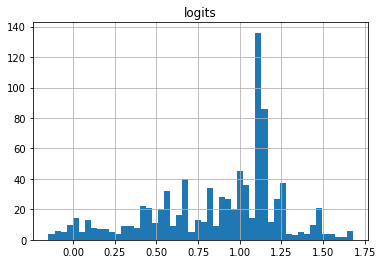

In [49]:
df_logits = pd.DataFrame({'logits':preds.tolist()})
df_logits.hist(bins=50)

In [50]:
# Mean Absolute Error (MAE)
np.mean([1, 2, 3.])
np.mean(abs(preds - df['Survived']))

0.772148753958519

In [51]:
preds[:10]

tensor([ 1.1644, -0.0036,  0.9165,  0.4315,  1.1427,  1.4681,  0.6084,  1.1672,  0.9020,  0.4193])

In [52]:
t_dep[:10]

tensor([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [53]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.7721)

In [72]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)- deps).mean()

## Gradient Descent

In [73]:
coeffs.requires_grad_()

tensor([ 0.2763,  0.4060, -0.1201,  0.4201, -0.0813, -0.0483, -0.2239,  0.2842,  0.3098, -0.3601,  0.4093, -0.0088], requires_grad=True)

In [74]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.5973, grad_fn=<MeanBackward0>)

In [75]:
# Calculate gradients on loss function
loss.backward()

In [76]:
coeffs.grad

tensor([ 0.2029,  0.0210,  0.0007,  0.0468, -0.1145,  0.3423, -0.1324,  0.0157,  0.3446, -0.0786,  0.0842,  0.2222])

In [77]:
# Gradients are not being reset to zero and grow each time this code is run
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([ 0.4057,  0.0421,  0.0015,  0.0935, -0.2290,  0.6846, -0.2649,  0.0314,  0.6891, -0.1571,  0.1684,  0.4444])

In [78]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.4930)


## Training

In [79]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [80]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(713, 178)

In [81]:
trn_indep.shape

torch.Size([713, 12])

In [82]:
trn_dep.shape

torch.Size([713])

In [83]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [84]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [85]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [86]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(42)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [87]:
coeffs = train_model(epochs=18, lr=0.2)

0.626; 0.555; 0.507; 0.468; 0.433; 0.418; 0.387; 0.397; 0.348; 0.364; 0.378; 0.313; 0.347; 0.346; 0.295; 0.312; 0.304; 0.331; 

In [88]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))

In [89]:
show_coeffs()

{'Age': tensor(-0.1700),
 'SibSp': tensor(0.0953),
 'Parch': tensor(0.2385),
 'LogFare': tensor(0.0079),
 'Sex_female': tensor(0.2501),
 'Sex_male': tensor(-0.4505),
 'Pclass_1': tensor(0.7008),
 'Pclass_2': tensor(0.4409),
 'Pclass_3': tensor(0.3169),
 'Embarked_C': tensor(0.0691),
 'Embarked_Q': tensor(0.2670),
 'Embarked_S': tensor(0.1751)}

## Measuring accuracy

In [104]:
# Note that the accuracy can be used for gradient descent

In [94]:
coeffs*val_indep

tensor([[-0.1452,  0.0000,  0.0000,  0.0033,  0.2501, -0.0000,  0.0000,  0.4409,  0.0000,  0.0000,  0.2670,  0.0000],
        [-0.1452,  0.0000,  0.0000,  0.0027,  0.0000, -0.4505,  0.0000,  0.0000,  0.3169,  0.0000,  0.2670,  0.0000],
        [-0.1452,  0.0000,  0.0000,  0.0027,  0.0000, -0.4505,  0.0000,  0.0000,  0.3169,  0.0691,  0.0000,  0.0000],
        [-0.1385,  0.0000,  0.0000,  0.0055,  0.0000, -0.4505,  0.0000,  0.4409,  0.0000,  0.0000,  0.0000,  0.1751],
        [-0.1462,  0.0000,  0.0000,  0.0033,  0.0000, -0.4505,  0.0000,  0.4409,  0.0000,  0.0000,  0.0000,  0.1751],
        [-0.1530,  0.0119,  0.0000,  0.0039,  0.0000, -0.4505,  0.0000,  0.4409,  0.0000,  0.0000,  0.0000,  0.1751],
        [-0.0968,  0.0000,  0.0397,  0.0034,  0.2501, -0.0000,  0.0000,  0.0000,  0.3169,  0.0691,  0.0000,  0.0000],
        ...,
        [-0.1398,  0.0000,  0.0000,  0.0035,  0.0000, -0.4505,  0.0000,  0.0000,  0.3169,  0.0000,  0.0000,  0.1751],
        [-0.1432,  0.0119,  0.0000,  0.0053

In [96]:
preds = calc_preds(coeffs=coeffs, indeps=val_indep)

In [101]:
results = val_dep.bool() == (preds > 0.5)
results.sum()/len(val_dep)

tensor(0.7921)

In [102]:
results.float().mean()

tensor(0.7921)

In [103]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.7921)

## Using a squishing function (Sigmoid)

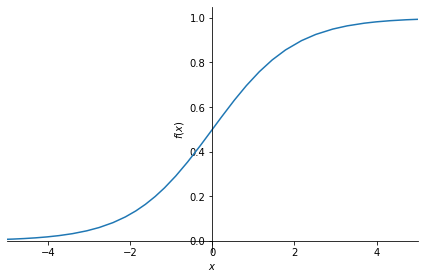

In [106]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5));

In [108]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

Train a new model

In [116]:
coeffs = train_model(epochs=30, lr=10)

0.489; 0.351; 0.322; 0.290; 0.269; 0.257; 0.249; 0.243; 0.239; 0.235; 0.233; 0.231; 0.229; 0.227; 0.226; 0.225; 0.224; 0.223; 0.222; 0.221; 0.220; 0.220; 0.219; 0.219; 0.218; 0.217; 0.217; 0.216; 0.216; 0.215; 

In [117]:
acc(coeffs)

tensor(0.8258)

In [118]:
show_coeffs()

{'Age': tensor(-0.7887),
 'SibSp': tensor(-0.3541),
 'Parch': tensor(0.0124),
 'LogFare': tensor(0.1733),
 'Sex_female': tensor(3.2781),
 'Sex_male': tensor(-3.8852),
 'Pclass_1': tensor(1.5731),
 'Pclass_2': tensor(1.1806),
 'Pclass_3': tensor(-1.7017),
 'Embarked_C': tensor(0.3123),
 'Embarked_Q': tensor(0.7519),
 'Embarked_S': tensor(-0.9596)}

## Submitting to kaggle

In [119]:
tst_df = pd.read_csv(path/'test.csv')

In [120]:
tst_df['Fare'] = tst_df.Fare.fillna(0)

In [121]:
tst_df.fillna(modes, inplace=True)
tst_df['LogFare'] = np.log1p(tst_df['Fare'])
tst_df = pd.get_dummies(tst_df, columns=["Sex","Pclass","Embarked"])

tst_indep = tensor(tst_df[indep_cols].values, dtype=torch.float)
tst_indep = tst_indep / vals

In [122]:
tst_df['Survived'] = (calc_preds(tst_indep, coeffs)>0.5).int()

In [123]:
sub_df = tst_df[['PassengerId','Survived']]
sub_df.to_csv('sub.csv', index=False)

In [124]:
!head sub.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,0
899,0
900,0
